In [1]:
%matplotlib inline

In [2]:
import pickle

import gc
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

### Read processed data 

In [3]:
df = pd.read_pickle("df.pkl")

In [4]:
drop_columns = [c for c in df if c[-1] not in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0'] and c.startswith('target')]
drop_columns += ['ID']
features = df.columns.difference(drop_columns)

In [5]:
f0 = df.date_block_num < 34
f1 = df.date_block_num == 34

train, val = train_test_split(df[f0], test_size=0.2, stratify=df[f0]['target'])
test = df[f1]

Train = xgb.DMatrix(train[features], train['target'])
Val = xgb.DMatrix(val[features], val['target'])
Test = xgb.DMatrix(test[features])

D:\Anaconda3\envs\dl\lib\site-packages\xgboost-0.83.dev0-py3.6.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\envs\dl\lib\site-packages\xgboost-0.83.dev0-py3.6.egg\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [6]:
del df
gc.collect()

6

### XGBoost Training

In [7]:
%%time

xgb_params = {
    'eval_metric': 'rmse',
    'lambda': '0.171', 
    'gamma': '0.124',
    'booster': 'gbtree', 
    'alpha': '0.170',
    'objective': 'reg:squarederror',
    'colsample_bytree': '0.715',
    'subsample': '0.874', 
    'silent': True,
    'min_child_weight': 26,
    'eta': '0.148',
    'max_depth': 6,
    'tree_method': 'gpu_hist', 
    'n_gpus': 1
}


model = xgb.train(xgb_params, Train, 1500, [(Train, 'Train'), (Val, 'Val')], early_stopping_rounds=10, verbose_eval=1)

[0]	Train-rmse:1.16778	Val-rmse:1.16781
Multiple eval metrics have been passed: 'Val-rmse' will be used for early stopping.

Will train until Val-rmse hasn't improved in 10 rounds.
[1]	Train-rmse:1.11211	Val-rmse:1.11211
[2]	Train-rmse:1.06712	Val-rmse:1.06721
[3]	Train-rmse:1.03348	Val-rmse:1.03355
[4]	Train-rmse:1.00758	Val-rmse:1.0079
[5]	Train-rmse:0.988121	Val-rmse:0.988603
[6]	Train-rmse:0.971423	Val-rmse:0.971933
[7]	Train-rmse:0.95996	Val-rmse:0.960623
[8]	Train-rmse:0.948771	Val-rmse:0.949513
[9]	Train-rmse:0.939645	Val-rmse:0.940435
[10]	Train-rmse:0.932599	Val-rmse:0.933479
[11]	Train-rmse:0.927308	Val-rmse:0.928325
[12]	Train-rmse:0.92314	Val-rmse:0.924314
[13]	Train-rmse:0.919239	Val-rmse:0.920623
[14]	Train-rmse:0.915934	Val-rmse:0.917316
[15]	Train-rmse:0.913299	Val-rmse:0.914785
[16]	Train-rmse:0.911319	Val-rmse:0.912916
[17]	Train-rmse:0.909089	Val-rmse:0.910716
[18]	Train-rmse:0.907344	Val-rmse:0.909077
[19]	Train-rmse:0.905679	Val-rmse:0.907507
[20]	Train-rmse:0.9042

[187]	Train-rmse:0.844374	Val-rmse:0.853134
[188]	Train-rmse:0.844052	Val-rmse:0.852876
[189]	Train-rmse:0.843984	Val-rmse:0.85282
[190]	Train-rmse:0.843794	Val-rmse:0.85266
[191]	Train-rmse:0.843707	Val-rmse:0.852626
[192]	Train-rmse:0.843547	Val-rmse:0.852498
[193]	Train-rmse:0.843476	Val-rmse:0.85248
[194]	Train-rmse:0.843374	Val-rmse:0.852394
[195]	Train-rmse:0.843244	Val-rmse:0.852292
[196]	Train-rmse:0.842938	Val-rmse:0.85202
[197]	Train-rmse:0.842812	Val-rmse:0.851931
[198]	Train-rmse:0.84275	Val-rmse:0.851914
[199]	Train-rmse:0.842084	Val-rmse:0.851314
[200]	Train-rmse:0.841996	Val-rmse:0.851265
[201]	Train-rmse:0.841821	Val-rmse:0.851136
[202]	Train-rmse:0.841776	Val-rmse:0.851129
[203]	Train-rmse:0.841655	Val-rmse:0.851049
[204]	Train-rmse:0.841556	Val-rmse:0.850994
[205]	Train-rmse:0.841473	Val-rmse:0.85095
[206]	Train-rmse:0.841259	Val-rmse:0.850767
[207]	Train-rmse:0.841171	Val-rmse:0.850722
[208]	Train-rmse:0.840971	Val-rmse:0.850567
[209]	Train-rmse:0.840892	Val-rmse:0.8

[375]	Train-rmse:0.82242	Val-rmse:0.838133
[376]	Train-rmse:0.822357	Val-rmse:0.838126
[377]	Train-rmse:0.822294	Val-rmse:0.838097
[378]	Train-rmse:0.822263	Val-rmse:0.838083
[379]	Train-rmse:0.822223	Val-rmse:0.838063
[380]	Train-rmse:0.822157	Val-rmse:0.838048
[381]	Train-rmse:0.82212	Val-rmse:0.838048
[382]	Train-rmse:0.822049	Val-rmse:0.838052
[383]	Train-rmse:0.821997	Val-rmse:0.838034
[384]	Train-rmse:0.821945	Val-rmse:0.838009
[385]	Train-rmse:0.821907	Val-rmse:0.837997
[386]	Train-rmse:0.821849	Val-rmse:0.837977
[387]	Train-rmse:0.821749	Val-rmse:0.837946
[388]	Train-rmse:0.8217	Val-rmse:0.837944
[389]	Train-rmse:0.821602	Val-rmse:0.837889
[390]	Train-rmse:0.821524	Val-rmse:0.837849
[391]	Train-rmse:0.821454	Val-rmse:0.837829
[392]	Train-rmse:0.821407	Val-rmse:0.837827
[393]	Train-rmse:0.82137	Val-rmse:0.837808
[394]	Train-rmse:0.821293	Val-rmse:0.83776
[395]	Train-rmse:0.821227	Val-rmse:0.837738
[396]	Train-rmse:0.821156	Val-rmse:0.837693
[397]	Train-rmse:0.821127	Val-rmse:0.8

[563]	Train-rmse:0.808172	Val-rmse:0.829813
[564]	Train-rmse:0.808079	Val-rmse:0.829759
[565]	Train-rmse:0.80801	Val-rmse:0.829722
[566]	Train-rmse:0.807975	Val-rmse:0.829714
[567]	Train-rmse:0.807857	Val-rmse:0.829641
[568]	Train-rmse:0.807811	Val-rmse:0.829634
[569]	Train-rmse:0.80777	Val-rmse:0.829616
[570]	Train-rmse:0.807691	Val-rmse:0.82957
[571]	Train-rmse:0.807649	Val-rmse:0.829574
[572]	Train-rmse:0.807613	Val-rmse:0.829573
[573]	Train-rmse:0.807551	Val-rmse:0.829555
[574]	Train-rmse:0.807457	Val-rmse:0.829487
[575]	Train-rmse:0.807403	Val-rmse:0.829459
[576]	Train-rmse:0.807365	Val-rmse:0.829441
[577]	Train-rmse:0.807312	Val-rmse:0.829417
[578]	Train-rmse:0.807252	Val-rmse:0.829395
[579]	Train-rmse:0.8072	Val-rmse:0.829377
[580]	Train-rmse:0.807171	Val-rmse:0.829381
[581]	Train-rmse:0.807127	Val-rmse:0.829381
[582]	Train-rmse:0.806828	Val-rmse:0.829207
[583]	Train-rmse:0.806757	Val-rmse:0.829187
[584]	Train-rmse:0.806702	Val-rmse:0.829157
[585]	Train-rmse:0.806674	Val-rmse:0.

[751]	Train-rmse:0.796389	Val-rmse:0.823499
[752]	Train-rmse:0.796356	Val-rmse:0.823501
[753]	Train-rmse:0.796335	Val-rmse:0.8235
[754]	Train-rmse:0.796304	Val-rmse:0.823497
[755]	Train-rmse:0.795924	Val-rmse:0.823057
[756]	Train-rmse:0.79589	Val-rmse:0.823065
[757]	Train-rmse:0.795864	Val-rmse:0.823059
[758]	Train-rmse:0.795707	Val-rmse:0.822915
[759]	Train-rmse:0.795662	Val-rmse:0.822899
[760]	Train-rmse:0.795608	Val-rmse:0.822878
[761]	Train-rmse:0.795548	Val-rmse:0.822837
[762]	Train-rmse:0.795514	Val-rmse:0.822822
[763]	Train-rmse:0.795469	Val-rmse:0.822805
[764]	Train-rmse:0.795434	Val-rmse:0.822795
[765]	Train-rmse:0.795372	Val-rmse:0.822731
[766]	Train-rmse:0.795327	Val-rmse:0.822697
[767]	Train-rmse:0.795295	Val-rmse:0.822682
[768]	Train-rmse:0.795275	Val-rmse:0.822666
[769]	Train-rmse:0.795178	Val-rmse:0.822604
[770]	Train-rmse:0.794956	Val-rmse:0.822358
[771]	Train-rmse:0.794921	Val-rmse:0.822332
[772]	Train-rmse:0.794762	Val-rmse:0.822144
[773]	Train-rmse:0.794712	Val-rmse:

[939]	Train-rmse:0.785687	Val-rmse:0.817168
[940]	Train-rmse:0.785671	Val-rmse:0.817169
[941]	Train-rmse:0.785649	Val-rmse:0.817167
[942]	Train-rmse:0.785596	Val-rmse:0.817149
[943]	Train-rmse:0.785573	Val-rmse:0.817158
[944]	Train-rmse:0.785539	Val-rmse:0.817132
[945]	Train-rmse:0.785497	Val-rmse:0.817118
[946]	Train-rmse:0.785436	Val-rmse:0.817059
[947]	Train-rmse:0.7854	Val-rmse:0.817041
[948]	Train-rmse:0.785368	Val-rmse:0.817031
[949]	Train-rmse:0.785342	Val-rmse:0.817018
[950]	Train-rmse:0.785325	Val-rmse:0.817019
[951]	Train-rmse:0.785302	Val-rmse:0.817017
[952]	Train-rmse:0.785243	Val-rmse:0.816982
[953]	Train-rmse:0.785216	Val-rmse:0.816979
[954]	Train-rmse:0.785186	Val-rmse:0.816959
[955]	Train-rmse:0.785069	Val-rmse:0.816883
[956]	Train-rmse:0.785038	Val-rmse:0.816878
[957]	Train-rmse:0.785003	Val-rmse:0.816863
[958]	Train-rmse:0.784959	Val-rmse:0.816866
[959]	Train-rmse:0.784919	Val-rmse:0.816855
[960]	Train-rmse:0.784897	Val-rmse:0.816844
[961]	Train-rmse:0.784862	Val-rmse

[1124]	Train-rmse:0.778113	Val-rmse:0.813821
[1125]	Train-rmse:0.778094	Val-rmse:0.813824
[1126]	Train-rmse:0.77797	Val-rmse:0.813753
[1127]	Train-rmse:0.777951	Val-rmse:0.813749
[1128]	Train-rmse:0.777932	Val-rmse:0.813747
[1129]	Train-rmse:0.777871	Val-rmse:0.813719
[1130]	Train-rmse:0.777783	Val-rmse:0.813663
[1131]	Train-rmse:0.77776	Val-rmse:0.813656
[1132]	Train-rmse:0.77774	Val-rmse:0.813657
[1133]	Train-rmse:0.777653	Val-rmse:0.813606
[1134]	Train-rmse:0.777635	Val-rmse:0.813601
[1135]	Train-rmse:0.777615	Val-rmse:0.813593
[1136]	Train-rmse:0.777589	Val-rmse:0.813597
[1137]	Train-rmse:0.777552	Val-rmse:0.813591
[1138]	Train-rmse:0.777531	Val-rmse:0.813595
[1139]	Train-rmse:0.777493	Val-rmse:0.813591
[1140]	Train-rmse:0.777402	Val-rmse:0.813531
[1141]	Train-rmse:0.777244	Val-rmse:0.813381
[1142]	Train-rmse:0.777216	Val-rmse:0.813365
[1143]	Train-rmse:0.777181	Val-rmse:0.813361
[1144]	Train-rmse:0.777173	Val-rmse:0.813355
[1145]	Train-rmse:0.777134	Val-rmse:0.813367
[1146]	Train-

[1307]	Train-rmse:0.771182	Val-rmse:0.810479
[1308]	Train-rmse:0.771153	Val-rmse:0.810472
[1309]	Train-rmse:0.770992	Val-rmse:0.810348
[1310]	Train-rmse:0.770959	Val-rmse:0.810335
[1311]	Train-rmse:0.770945	Val-rmse:0.810331
[1312]	Train-rmse:0.770913	Val-rmse:0.810325
[1313]	Train-rmse:0.77082	Val-rmse:0.810282
[1314]	Train-rmse:0.770773	Val-rmse:0.810253
[1315]	Train-rmse:0.770755	Val-rmse:0.810254
[1316]	Train-rmse:0.77074	Val-rmse:0.810244
[1317]	Train-rmse:0.770685	Val-rmse:0.810201
[1318]	Train-rmse:0.770654	Val-rmse:0.810207
[1319]	Train-rmse:0.77064	Val-rmse:0.810206
[1320]	Train-rmse:0.770621	Val-rmse:0.810209
[1321]	Train-rmse:0.770609	Val-rmse:0.810215
[1322]	Train-rmse:0.77059	Val-rmse:0.810205
[1323]	Train-rmse:0.770564	Val-rmse:0.8102
[1324]	Train-rmse:0.770544	Val-rmse:0.810197
[1325]	Train-rmse:0.770518	Val-rmse:0.810188
[1326]	Train-rmse:0.770335	Val-rmse:0.810055
[1327]	Train-rmse:0.77031	Val-rmse:0.810056
[1328]	Train-rmse:0.770297	Val-rmse:0.810047
[1329]	Train-rmse

[1491]	Train-rmse:0.764688	Val-rmse:0.80733
[1492]	Train-rmse:0.764674	Val-rmse:0.807337
[1493]	Train-rmse:0.764614	Val-rmse:0.807336
[1494]	Train-rmse:0.764597	Val-rmse:0.807329
[1495]	Train-rmse:0.76458	Val-rmse:0.807328
[1496]	Train-rmse:0.764555	Val-rmse:0.807323
[1497]	Train-rmse:0.764523	Val-rmse:0.807311
[1498]	Train-rmse:0.764501	Val-rmse:0.807296
[1499]	Train-rmse:0.764467	Val-rmse:0.807264
Wall time: 7min 19s


### Predict test data

In [8]:
test['item_cnt_month'] = model.predict(Test).clip(0, 20)

### Save submission & model

In [9]:
test[['ID', 'item_cnt_month']].sort_values('ID').to_csv('submission.csv', index=False)
pickle.dump(model, open('xgb.pickle', 'wb'))

### Plot importance feature

In [10]:
model = pickle.load(open('xgb.pickle', 'rb'))

In [11]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return xgb.plot_importance(booster=booster, ax=ax)

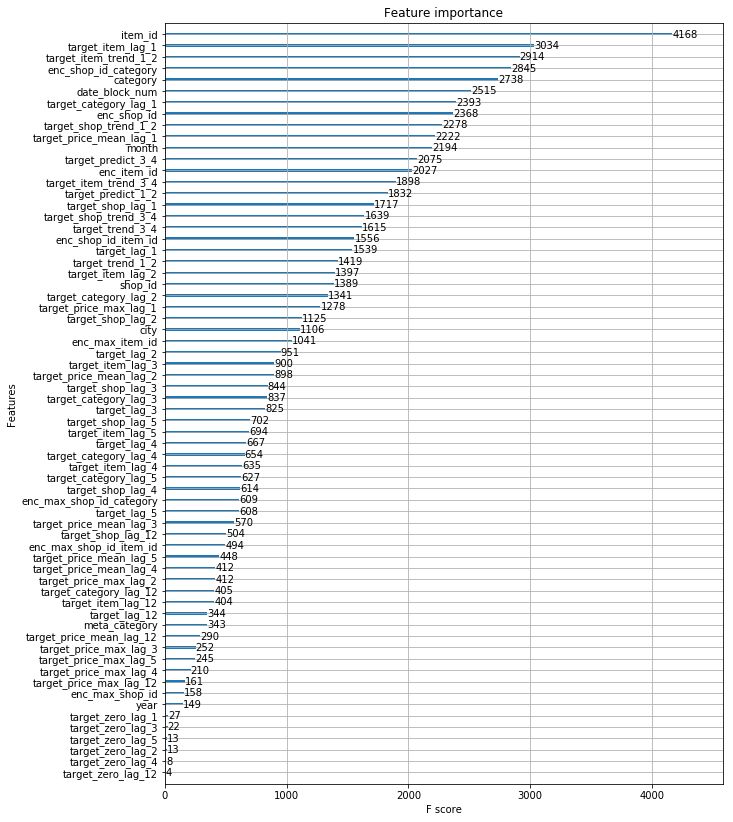

In [12]:
plot_features(model, (10,14))